## Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Loading Both Datasets

In [4]:
# Load Fear & Greed Index
fear_greed = pd.read_csv("data/fear_greed_index.csv")
print("Fear & Greed Index:")
display(fear_greed.head())

# Load Historical Trader Data
trader_data = pd.read_csv("data/historical_data.csv")
print("\nHistorical Trader Data:")
display(trader_data.head())

Fear & Greed Index:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Historical Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


## Displaying the actual column names

In [6]:
print("Fear & Greed Index Columns:")
print(fear_greed.columns.tolist())

print("\nTrader Data Columns:")
print(trader_data.columns.tolist())

Fear & Greed Index Columns:
['timestamp', 'value', 'classification', 'date']

Trader Data Columns:
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


## Cleaning & Preparing the Fear & Greed Index data

In [7]:
# Converting 'date' to datetime
fear_greed['date'] = pd.to_datetime(fear_greed['date'])

# Keeping only important columns: 'date' and 'classification'
fear_greed_clean = fear_greed[['date', 'classification']].copy()

# Checking for nulls
print("Nulls in Fear & Greed Index:")
print(fear_greed_clean.isnull().sum())

fear_greed_clean.head()

Nulls in Fear & Greed Index:
date              0
classification    0
dtype: int64


,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


## Cleaning & Preparing the Trader Data

In [8]:
# Converting 'Timestamp IST' to datetime
trader_data['Timestamp IST'] = pd.to_datetime(trader_data['Timestamp IST'], errors='coerce')

# Extracting only the date part for matching with Fear & Greed data
trader_data['date'] = trader_data['Timestamp IST'].dt.date
trader_data['date'] = pd.to_datetime(trader_data['date'])  # Ensure it's datetime type

# Checking for nulls in important columns
print("Nulls in Trader Data:")
print(trader_data[['Timestamp IST', 'Closed PnL', 'date']].isnull().sum())

trader_data[['Account', 'Closed PnL', 'date']].head()

Nulls in Trader Data:
Timestamp IST    131999
Closed PnL            0
date             131999
dtype: int64


,Account,Closed PnL,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,2024-02-12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,2024-02-12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,2024-02-12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,2024-02-12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,2024-02-12


## Dropping Null Timestamps

In [9]:
# Dropping rows with missing dates
cleaned_trader_data = trader_data.dropna(subset=['date'])

# Confirming the cleaned size
print(f"Original rows: {len(trader_data)}")
print(f"After cleaning: {len(cleaned_trader_data)}")

Original rows: 211224
After cleaning: 79225


## Merging Trader Data with Fear & Greed Index

In [10]:
# Merging cleaned trader data with Fear & Greed Index on 'date'
merged_data = pd.merge(cleaned_trader_data, fear_greed, on='date', how='left')

# Checking for a successful merge
print("Merged Data Sample:")
merged_data[['Account', 'Closed PnL', 'date', 'classification']].head()

Merged Data Sample:


,Account,Closed PnL,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,2024-02-12,Greed


## Analyzing Trader Performance vs. Market Sentiment

In [11]:
# Converting Closed PnL to numeric in case it's not
merged_data['Closed PnL'] = pd.to_numeric(merged_data['Closed PnL'], errors='coerce')

# Grouping by sentiment and calculating average PnL
avg_pnl_by_sentiment = merged_data.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)

print("Average Closed PnL per Sentiment:")
display(avg_pnl_by_sentiment)

Average Closed PnL per Sentiment:


classification
Extreme Greed    205.816345
Fear             128.287950
Greed             53.988003
Neutral           27.088803
Extreme Fear       1.891632
Name: Closed PnL, dtype: float64

## Visualizing Trader Profit vs Sentiment

C:\Users\KIIT\AppData\Local\Temp\ipykernel_31668\3804773638.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pnl_by_sentiment.index, y=avg_pnl_by_sentiment.values, palette='coolwarm')


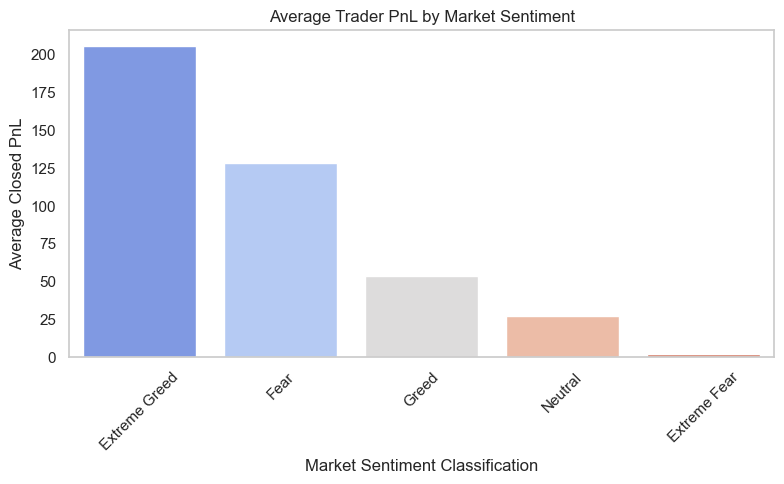

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_pnl_by_sentiment.index, y=avg_pnl_by_sentiment.values, palette='coolwarm')
plt.title("Average Trader PnL by Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.xlabel("Market Sentiment Classification")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Creating 'merged' DataFrame

In [14]:
# Converting 'date' and 'Timestamp IST' to datetime
fear_greed['date'] = pd.to_datetime(fear_greed['date'])
trader_data['Timestamp IST'] = pd.to_datetime(trader_data['Timestamp IST'])

# Extracting date only from trader_data timestamp
trader_data['date'] = trader_data['Timestamp IST'].dt.date
fear_greed['date'] = fear_greed['date'].dt.date

# Merging both DataFrames on 'date'
merged = pd.merge(trader_data, fear_greed[['date', 'classification']], on='date', how='inner')

## Saving the 'merged' .csv file

In [15]:
merged.to_csv("data/merged_sentiment_trades.csv", index=False)

## Analyzing Performance Based on Sentiment

Average Closed PnL by Sentiment:


classification
Extreme Greed    205.816345
Fear             128.287950
Greed             53.988003
Neutral           27.088803
Extreme Fear       1.891632
Name: Closed PnL, dtype: float64

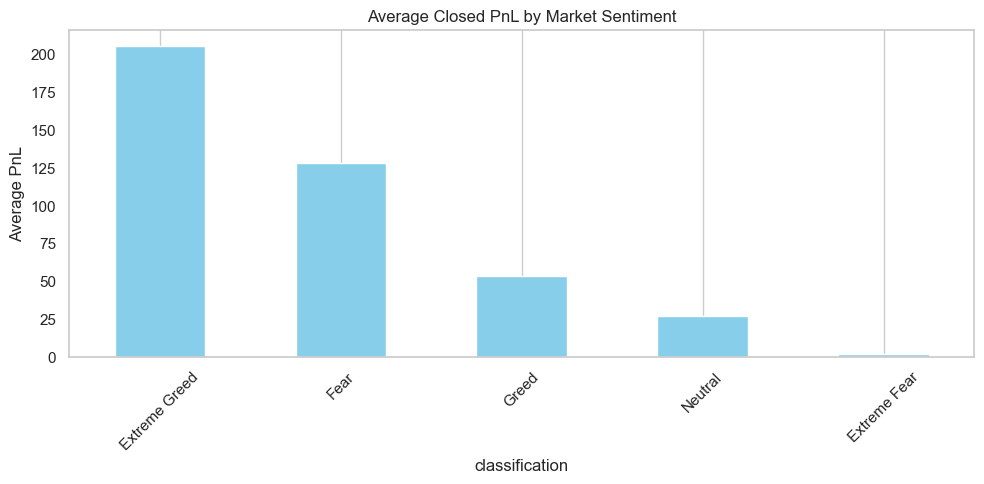

In [16]:
# Average Closed PnL per Sentiment Category
avg_pnl_by_sentiment = merged_data.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)

print("Average Closed PnL by Sentiment:")
display(avg_pnl_by_sentiment)

# Plotting it
avg_pnl_by_sentiment.plot(kind='bar', color='skyblue', title='Average Closed PnL by Market Sentiment', ylabel='Average PnL', figsize=(10, 5))
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##  Correlation Between Sentiment Score and PnL

In [17]:
correlation = merged_data['value'].corr(merged_data['Closed PnL'])
print(f"Correlation between Fear & Greed Value and Closed PnL: {correlation:.3f}")

Correlation between Fear & Greed Value and Closed PnL: 0.011


## Plotting the Scatterplot of Sentiment Value vs. PnL

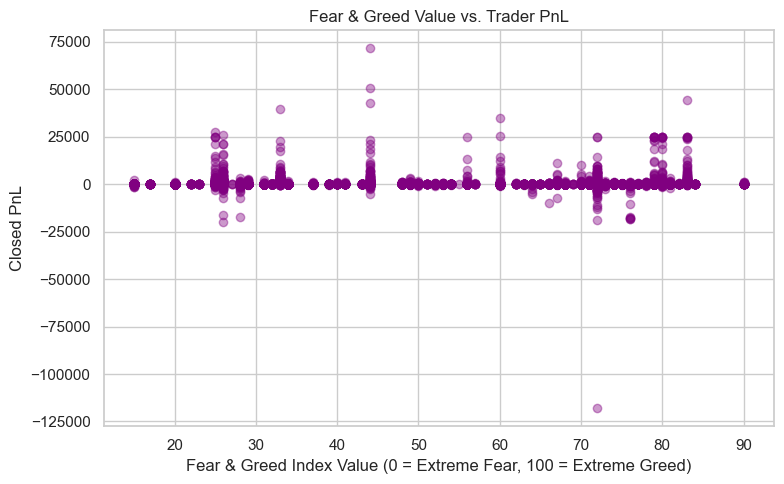

In [18]:
plt.figure(figsize=(8, 5))
plt.scatter(merged_data['value'], merged_data['Closed PnL'], alpha=0.4, c='purple')
plt.title('Fear & Greed Value vs. Trader PnL')
plt.xlabel('Fear & Greed Index Value (0 = Extreme Fear, 100 = Extreme Greed)')
plt.ylabel('Closed PnL')
plt.grid(True)
plt.tight_layout()
plt.show()